 # Linear Regression of Spotify Song Data
 ## by Anwaar Hadi
This Jupyter Notebook depicts the process of building a quantitative model of the top 2000 Spotify songs dataset found at https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset?resource=download. This dataset contains audio statistics of the top 2000 tracks on Spotify from the years 1956 to 2019. The goal of this analysis is to produce a regression model that can predict the "Danceability" score of a given song as a function of the other predictors in the dataset. The columns within the dataset are defined below, as well as at the link above. <br>

<strong> Index</strong> - ID or Primary Key identifier for a given song

<strong>Title</strong> - The name of the song

<strong>Artist</strong> - Name of the artist for the song

<strong>Top Genre</strong> - Genre of the track

<strong>Year</strong> - Release year of the track

<strong>Beats Per Minute(BPM)</strong> - Tempo of the song

<strong>Energy</strong> - The energy of the song, higher calues indicate more energetic songs

<strong>Danceability</strong> - Target for the regression. The higher the value, the easier it is to dance to the song

<strong>Loudness</strong> - How loud the song is, higher values indicate louder songs

<strong>Valence</strong> - Mood of the song, higher values indicate more positive mood songs

<strong>Length</strong> - The duration of the song

<strong>Acousticness</strong> - The amount of acoustics in the song, higher values indicate more acoustic songs

<strong>Speechiness</strong> - The amount of spoken words in the song, higher values indicate more spoken words in the song

<strong>Popularity</strong> - How popular the song is, higher values indicate more popular songs
 
This model was originally built using R, however I have opted to adapt the process of building the model to Python in order to practice using Python's data analysis and model building toolkits(e.g. numpy, pandas, and scikit-learn)

In [193]:
# import libraries/toolkits for data parsing and model building, namely numpy/pandas and scikit-learn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error

In [209]:
# Load song data into data frame. This can be done using pandas.
df_song_data = pd.read_csv('Spotify-2000.csv')
# Output aggregates for dataset
df_song_data.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [210]:
# Song(s) with the minimum Danceability score
df_song_data[df_song_data['Danceability'] == df_song_data['Danceability'].min()]

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1650,1651,Live Forever - Remastered,Oasis,britpop,1994,84,79,10,-4,36,18,277,0,4,55


In [211]:
# Song(s) with the maximum Danceability score
df_song_data[df_song_data['Danceability'] == df_song_data['Danceability'].max()]

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1477,1478,Kingston Town,UB40,reggae fusion,1989,102,25,96,-13,4,80,228,16,6,49
1752,1753,Around the World,Daft Punk,electro,1997,121,80,96,-5,9,84,430,0,15,70


In [212]:
# Fix some data values in the length columns, as pandas initially reads this as a string due to commas being used
# for values greater than 1000. These can be fixed by removing the commas and converting the column type to float
df_song_data['Length (Duration)'] = df_song_data['Length (Duration)'].str.replace(',', '')
df_song_data = df_song_data.astype({'Length (Duration)': float})

# Define predictors and target for regression. Note that several columns in the 
# dataset are not used as predictors, either due to having low predictive power(as
# is the case with the "Index" column), or being unfit for use in regression(as is the
# case with the string-valued columns, e.g. "Title")
predictors = [
    'Year', 
    'Beats Per Minute (BPM)',
    'Energy',
    'Loudness (dB)',
    'Valence',
    'Acousticness',
    'Speechiness',
    'Popularity',
    'Length (Duration)'
]
target = ['Danceability']
X = df_song_data[predictors]
y = df_song_data[target]

In [213]:
# Perform a 60-40 train/test split on the data. In this case, 60% of the data would be used for estimation of the
# model coefficients, and the rest would be used for projection testing of the model, including calculating
# residuals and determining root-mean squared error to ensure the model's efficacy. This can be done by using the 
# train_test_split() function from the scikit-learn package.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [214]:
# Fit a linear model using the training sets. This can be done using the LinearRegression() constructor and fit()
# function from the scikit-learn package
song_model = lm.LinearRegression()
song_model.fit(X_train, y_train)

LinearRegression()

In [215]:
# Use model to project test data. This can be done using the predict() function from the scikit-learn package
projected_song_data = song_model.predict(X_test)

In [216]:
# Display coefficients of model
# Note that since this is a multiple linear regression model, the equation will take the form
# Danceability = w1*Year + w2*BPM + w3*Energy + w4*Loudness + w5* Valence + w6*Acousticness + w7*Speechiness +
# w8*Popularity + w9*Length + w0, where w1...w9 are the coefficients and w0 is the offset or intercept of the model

print("The intercept of the model is:", song_model.intercept_[0,])
print("---------------------------------------------------------------------------------------")
for i, predictor in enumerate(predictors):
    print("Predictior: " + predictor + "\nCoefficient: " + str(song_model.coef_[0, i]))
    print("-----------------------------------------------------------------------------------")

The intercept of the model is: -374.62231963275644
---------------------------------------------------------------------------------------
Predictior: Year
Coefficient: 0.20943135620525224
-----------------------------------------------------------------------------------
Predictior: Beats Per Minute (BPM)
Coefficient: -0.10178126917947633
-----------------------------------------------------------------------------------
Predictior: Energy
Coefficient: -0.12039028266420382
-----------------------------------------------------------------------------------
Predictior: Loudness (dB)
Coefficient: -0.19926805649896268
-----------------------------------------------------------------------------------
Predictior: Valence
Coefficient: 0.3758096620948359
-----------------------------------------------------------------------------------
Predictior: Acousticness
Coefficient: -0.04001097161511921
-----------------------------------------------------------------------------------
Predictior: Sp

The coefficients for each predictor in the multiple linear regression model are given above. The equation for predicting the Danceability score is given by<br>
<br>
$
(Danceability) = w1*(Year) + w2*(Beats Per Minute) + w3*(Energy) + w4*(Loudness) + w5*(Valence) + w6*(Acousticness) + w7*(Speechiness) + w8*(Popularity) + w9*(Length) + w0
$
<br>
where $w1...w9$ are the coefficients for the respective predictors($Year...Length$) and $w0$ is the offset or intercept of the model. It is worth noting that some of the coefficients(such as Year, Valence, Speechiness, and Popularity) have positive coefficients while others(namely BPM, Energy, Loudness, and Acousticness) have negative coefficients. Given the equation for the regression, it naturally follows that coefficients with a positive value would have a positive impact on the Danceability score, and vice-versa(coefficients with a negative value would have a negative, or inverse, impact). This would imply that the more "Danceable" songs are typically those that are released more recently and are popular, have significant amounts of spoken words, and have a positive mood to the song. Conversely, high energy, loud, and fast songs with significant amounts of acoustics would typically be seen as less "Danceable". The latter point is an intriguing finding, as one would typically expect these songs to be easier to dance to, thus having a higher Danceability score.

Finally, it is worth noting that the coefficient for Length is very close to 0, and is much smaller in magnitude than the other coefficients. This seems to imply that the length or duration of a given song has little impact on its Danceability score.

In [225]:
# Print the residuals between the projected data and testing set. In this case, the residual at position i(res_i)
# would simply be the difference between the projected value at that position and the value of the test set at that
# position(i.e. res_i = proj_i - test_i)
residuals = projected_song_data - y_test
residuals

,Danceability
1217,-30.362334
1290,9.090166
1529,17.162115
407,19.167798
447,-5.556985
...,...
435,-8.745879
540,31.644669
1456,-9.015543
1307,7.393272


In [226]:
# Compute the Root-Mean Squared Error(RMSE) at the overall level for the dataset. This can be done easily using the
# mean_squared_error() function from the scikit-learn package. The RMSE can also be normalized by the mean of the 
# test set in order to better analyze the error in the model
RMSE = mean_squared_error(y_test, projected_song_data, squared=False)
RMSE_normalized = RMSE / y_test['Danceability'].mean()
print("Root mean squared error(RMSE):", RMSE)
print("Normalized RMSE:", RMSE_normalized)

Root mean squared error(RMSE): 12.404851513263642
Normalized RMSE: 0.23367809611407359


The RMSE value shown above depicts on average the difference between any given Danceability score value in the projected set and the corresponding "actual" Danceability value in the test set, with the normalized RMSE providing a percentage interpretation of this value. Although it is also possible to segment the data by Artist or Genre and calculate residuals at that level of granularity, I opted to calculate across the dataset as a whole since the Artist and Genre categories have enough variability that a residual calculation using all of the data would likely be more useful.

<br>For a more visual take on residual analysis, we can use a Quantile-Quantile, or Q-Q, plot. In this plot, the projected values are plotted on the y-axis and the actual values are plotted on the x-axis. The more linear the resulting scatterplot is, the greater similarity between the projected and actual values(if the projected and actual values are equal, the points on the scatterplot would lie on the line y=x).

Text(0.5, 0, 'Actual Danceability Score')

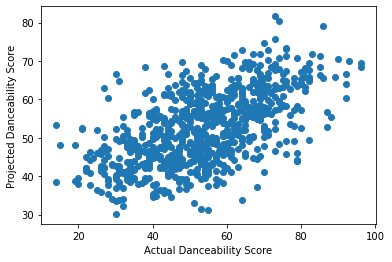

In [227]:
# import plotting library
import matplotlib.pyplot as plt

#plot scatter plot
plt.scatter(y_test, projected_song_data)
plt.ylabel('Projected Danceability Score')
plt.xlabel('Actual Danceability Score')

As can be seen above, while the data points do not lie exactly on a line of best fit, the data does follow a clear positive linear trend. This implies that the model is somewhat effective at predicting the Danceabiltiy score for a given song, although some variability is present in the projections.